# Validación del modelo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [4]:
a = np.random.randn(len(data))

(array([ 7., 14., 23., 38., 36., 29., 26., 17.,  6.,  4.]),
 array([-2.32975516, -1.82879899, -1.32784282, -0.82688666, -0.32593049,
         0.17502568,  0.67598185,  1.17693802,  1.67789419,  2.17885035,
         2.67980652]),
 <a list of 10 Patch objects>)

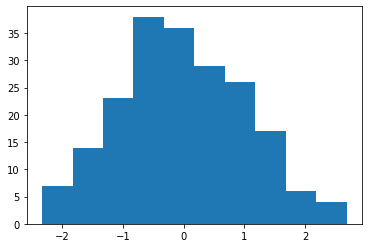

In [5]:
plt.hist(a)

In [6]:
check = (a<0.8)  #Se toma el 80% del array distribuido
training = data[check]
testing = data[~check]

In [7]:
len(training), len(testing)

(150, 50)

In [9]:
import statsmodels.formula.api as smf

In [10]:
lm = smf.ols(formula = "Sales~TV+Radio", data = training).fit()

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     680.5
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           4.84e-75
Time:                        15:33:30   Log-Likelihood:                -282.97
No. Observations:                 150   AIC:                             571.9
Df Residuals:                     147   BIC:                             581.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6623      0.337      7.889      0.000       1.995       3.329
TV             0.0459      0.002     29.545      0.000       0.043       0.049
Radio          0.1957      0.009     22.182      0.000       0.178       0.213
==============================================================================
Omnibus:                       14.457   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.837
Skew:                          -0.782   Prob(JB):                     0.000364
Kurtosis:                       3.293   Cond. No.                         441.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales = 2.6623 + 0.0459 * TV + 0.1957 * Radio

In [15]:
sales_pred = lm.predict(testing)
SSD = sum((testing["Sales"] - sales_pred) ** 2)
SSD

178.26201880526628

In [16]:
nvariables = 2 #TV y Radio
RSE = np.sqrt(SSD / (len(testing) - nvariables - 1))

In [17]:
RSE

1.9475135200430178

In [19]:
sales_mean = np.mean(testing["Sales"])
error = RSE / sales_mean
error

0.14051324098434473